In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import statistics 
from scipy import stats
from scipy import signal
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import lognorm
from pandas import DataFrame
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import special
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import pandas as pd

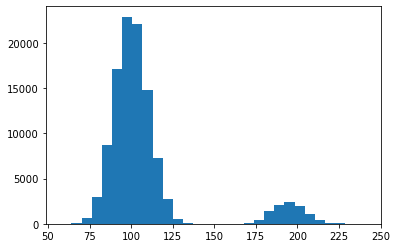

154.0
190.0


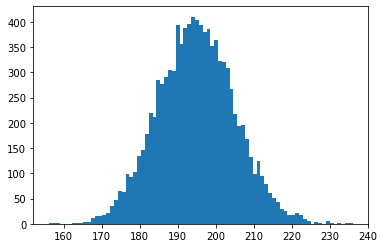

In [27]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = poisson.stats(100, moments='mvsk')
#plt.yscale('log')
plt.tick_params(labelsize = 10)
plt.title('', fontsize='15')
plt.xlabel('', fontsize='15')
plt.ylabel('', fontsize='15')
d = np.append(stats.poisson.rvs(100,size = 100000),
              stats.poisson.rvs(100,size = 10000)+95)

ax.hist(d,30)
plt.show()

print(poisson.ppf(norm.cdf(5),100))
print(poisson.ppf(norm.cdf(8),100))
fig, ax = plt.subplots(1, 1)
s = stats.poisson.rvs(100,size = 10000)+95
ax.hist(s,79)
plt.show()

Problem 1 - (see first graph above) I generated a poisson (on the left) centered at 100 that represents pure background signal. 

Problem 2 

a) The observed data is just left of the pure background and is functionally just the same background distrabution shifted up by the strength of the injected signal. Looking closer at this observed data on its own (second graph above), we can see that it is a indeed a poisson with a mean at 100(background mean)+95(signal strength). This histogram tells me that If there was a signal of satrength = 95, we would expect to see a background like curve with a mean strength of 195.

b)Since our background appears to be a very symmetric poisson, our observed signal will also by symmetric, or unbiassed in either direction. Equally likely to be larger or smaller. 

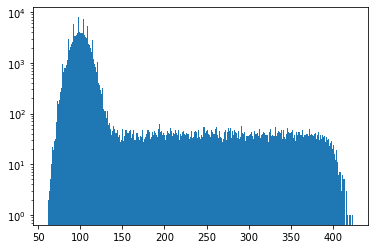

154.0
190.0


In [4]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = poisson.stats(100, moments='mvsk')
plt.yscale('log')
plt.tick_params(labelsize = 10)
plt.title('', fontsize='15')
plt.xlabel('', fontsize='15')
plt.ylabel('', fontsize='15')
d = np.append(stats.poisson.rvs(100,size = 100000),
              stats.poisson.rvs(100,size = 10000)+np.linspace(0,300,10000))

ax.hist(d,300)
plt.show()

print(poisson.ppf(norm.cdf(5),100))
print(poisson.ppf(norm.cdf(8),100))

Problem 3 

(above is a histogram of a spread of signals and a background curve. Although in the folowing analysis, we wont use the signal-less background curve seen on the left, just the background+signal data)

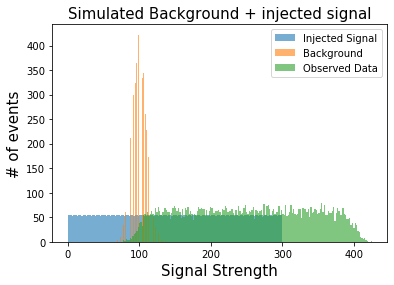

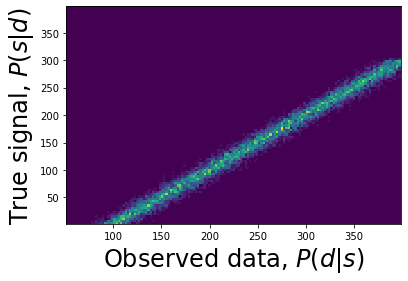

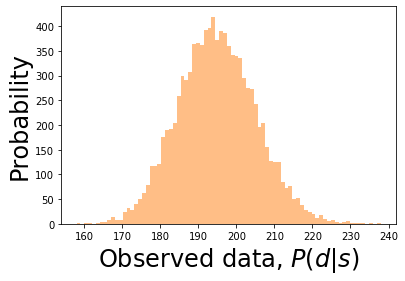

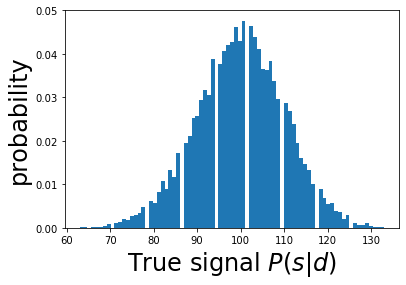

In [43]:
fig, ax = plt.subplots(1, 1)
#ax.hist(scipy.stats.poisson.rvs(X, size=100000),50, density=True)
mean, var, skew, kurt = poisson.stats(100, moments='mvsk')
#plt.yscale('log')
plt.tick_params(labelsize = 10)
plt.title('Simulated Background + injected signal', fontsize='15')
plt.xlabel('Signal Strength', fontsize='15')
plt.ylabel('# of events', fontsize='15')
b = stats.poisson.rvs(100,size = 10000)
d = np.linspace(0,300,10000)

ax.hist(d,186,alpha = 0.6, label = 'Injected Signal')
ax.hist(b,186,alpha = 0.6, label = 'Background')
ax.hist(b+d,186,alpha = 0.6, label = 'Observed Data')
plt.legend()
plt.show()

data = b + d

signaledges = np.linspace(0,400,100)
dataedges = np.linspace(50,400,150)

Psd, temp, temp2= np.histogram2d(data,d, bins=[dataedges,signaledges],density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()
data1 = b + 95

fig, ax = plt.subplots(1, 1)
s = stats.poisson.rvs(100,size = 10000)+95

plt.ylabel('Probability', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax.hist(data1, 79,density=True,alpha=0.5)
ax.hist(s,79,alpha=0.5)
plt.show()
data2 = 200-b

plt.ylabel('probability', fontsize = 24)
plt.xlabel('True signal $P(s|d)$', fontsize = 24)
plt.hist(data2, 79,density=True)
plt.show()

3a) In this case we are simulating observed data which is a mix of background data and a suite of injected signals from 0-300 The 2D histogram of signal vs observed is above

3b) In the third histogram above I plot both injected signal powers on top of eachother and we see no deviation or difference. So we can say that slicing the 2D histogram gives us the same answer as problem 2

3c) The 4th histogram above is a plot of the P(s|d) for a oberved signal of 200. This curve tells us the probability distrabution of a certain strength of true signal producing the observed signal we measured.

3d) Below I calculate the High and Low end 1 sigma values for the data set above. To do this I Cut out all data on the right side that didnt make up 68% from the mean, and took the high bound of that set. And did the same with the Low bound of 68% of the left side of the data set.

In [48]:
mu = data2.mean()
#print(mu)
DD = sorted(data2)
DDr = DD[4758:]
#print(DDr)
numpec = len(DDr)*.68
#print(numpec)
DDri = DDr[0:3565]
print("The high end uncertainty is",DDri[-1]-mu)

mu = data2.mean()
#print(mu)
DD = sorted(data2)
DDr = DD[0:4758]
#print(DDr)
numpec = len(DDr)*.68
#print(numpec)
#print(len(DDr)-numpec)
DDri = DDr[1522:]
print("The Low end uncertainty is" , (DDri[0]-mu)*(-1))
print("around a mean of", mu)

The high end uncertainty is 10.0257
The Low end uncertainty is 9.9743
around a mean of 99.9743


3e) The data set is very very very close to being symetric. I would say it is, within reasonable limits, not biased in either direction. This makes total sense since our signal was uniform from 0-300 and our background was a symettric poisson distribution with no skew. If there were more measured events i think it would be fair to say that any small bias that exsists would become even smaller. 